# NLP Preprocessing

In [31]:
# Importing Packages
import scrapy
from scrapy.crawler import CrawlerProcess
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from collections import Counter
import requests
from bs4 import BeautifulSoup
import nltk
import re
import spacy
from nltk.tokenize import RegexpTokenizer, TreebankWordTokenizer, WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import Levenshtein

### Extracting Data using Requests

In [32]:

# URLs to scrape
urls = [
    'https://en.wikipedia.org/wiki/Natural_language_processing',
    'https://en.wikipedia.org/wiki/Computational_linguistics',
    'https://en.wikipedia.org/wiki/Machine_learning',
    'https://en.wikipedia.org/wiki/List_of_most-visited_websites',
    'https://en.wikipedia.org/wiki/Social_media',
    'https://en.wikipedia.org/wiki/National_conventions_for_writing_telephone_numbers'
]

def extract_content(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Extract text from paragraphs, tables, and lists
    text_elements = soup.select('div.mw-parser-output p, div.mw-parser-output li, div.mw-parser-output td')
    
    # Extract text and preserve URLs
    content = []
    for element in text_elements:
        text = element.get_text()
        for link in element.find_all('a', href=True):
            if 'http' in link['href']:
                text = text.replace(link.get_text(), f"{link.get_text()} ({link['href']})")
        content.append(text)
    
    # Join all text elements
    full_content = ' '.join(content)
    
    # Remove extra whitespace
    full_content = re.sub(r'\s+', ' ', full_content).strip()
    
    return full_content

# Extract content from all URLs
corpus = ' '.join([extract_content(url) for url in urls])

# Print a sample of the extracted content
print("Sample of extracted content:")
print(corpus)
print("\nTotal characters extracted:", len(corpus))

Sample of extracted content:
This article needs additional citations for verification. Please help improve this article by adding citations to reliable sources. Unsourced material may be challenged and removed.Find sources: "Natural language processing" (https://www.google.com/search?as_eq=wikipedia&q=%22Natural+language+processing%22) – news (https://www.google.com/search?tbm=nws&q=%22Natural+language+processing%22+-wikipedia&tbs=ar:1) · news (https://www.google.com/search?tbm=nws&q=%22Natural+language+processing%22+-wikipedia&tbs=ar:1)papers · books (https://www.google.com/search?tbs=bks:1&q=%22Natural+language+processing%22+-wikipedia) · scholar (https://scholar.google.com/scholar?q=%22Natural+language+processing%22) · JSTOR (https://www.jstor.org/action/doBasicSearch?Query=%22Natural+language+processing%22&acc=on&wc=on) (May 2024) (Learn how and when to remove this message) Natural language processing (NLP) is an interdisciplinary subfield of computer science and artificial intelli

In [33]:
print(corpus)

This article needs additional citations for verification. Please help improve this article by adding citations to reliable sources. Unsourced material may be challenged and removed.Find sources: "Natural language processing" (https://www.google.com/search?as_eq=wikipedia&q=%22Natural+language+processing%22) – news (https://www.google.com/search?tbm=nws&q=%22Natural+language+processing%22+-wikipedia&tbs=ar:1) · news (https://www.google.com/search?tbm=nws&q=%22Natural+language+processing%22+-wikipedia&tbs=ar:1)papers · books (https://www.google.com/search?tbs=bks:1&q=%22Natural+language+processing%22+-wikipedia) · scholar (https://scholar.google.com/scholar?q=%22Natural+language+processing%22) · JSTOR (https://www.jstor.org/action/doBasicSearch?Query=%22Natural+language+processing%22&acc=on&wc=on) (May 2024) (Learn how and when to remove this message) Natural language processing (NLP) is an interdisciplinary subfield of computer science and artificial intelligence. It is primarily concer

## 1 & 2. Data Cleaning and Tokenization

We will be using the corpus generated using reqeusts and beautiful soup for our nlp task

In [34]:
#Installing nltk packages
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to C:\Users\Kaushik
[nltk_data]     Srivatsan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Kaushik
[nltk_data]     Srivatsan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Kaushik
[nltk_data]     Srivatsan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
#1. Counting the number of tokens and number of types in data.

# Tokenize the corpus
tokens = word_tokenize(corpus)

# Calculate types and tokens
types = set(tokens)
num_tokens = len(tokens)
num_types = len(types)

# Calculate TTR (Type-Token Ratio)
ttr = num_types / num_tokens

print(f"Number of tokens: {num_tokens}")
print(f"Number of types: {num_types}")
print(f"Type-Token Ratio (TTR): {ttr:.4f}")

Number of tokens: 75946
Number of types: 12899
Type-Token Ratio (TTR): 0.1698


In [36]:
#2. Frequency of all types in corpus

from tabulate import tabulate

#Printing it directly as a dictionary
print(Counter(tokens))

# Generate word frequency table
freq_dist = FreqDist(tokens)
word_freq_table = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)[:20]

freq_of_freq = Counter(freq_dist.values())
freq_of_freq_table = sorted(freq_of_freq.items(), key=lambda x: x[0])

print("\nWord Frequency Table (Top 20):")
print(tabulate(word_freq_table, headers=['Word', 'Frequency'], tablefmt='grid'))

# Generate frequency of frequencies table
freq_of_freq = Counter(freq_dist.values())
freq_of_freq_table = sorted(freq_of_freq.items(), key=lambda x: x[0])

print("\nFrequency of Frequencies Table:")
print(tabulate(freq_of_freq_table, headers=['Frequency', 'Count'], tablefmt='grid'))


Counter({'.': 4442, ',': 3231, ')': 2721, '(': 2718, ':': 2121, 'the': 1634, 'https': 1289, 'of': 1176, 'and': 1082, 'to': 850, 'a': 720, '``': 705, "''": 680, '[': 677, ']': 677, 'in': 670, ';': 635, '^': 600, '%': 476, 'is': 468, 'for': 441, 'on': 417, 'media': 357, 'learning': 332, 'The': 315, 'from': 308, 'as': 303, 'that': 292, 'social': 289, 'Retrieved': 285, 'or': 268, 'are': 268, 'with': 264, 'by': 239, 'numbers': 234, 'Social': 232, '&': 182, 'Media': 160, 'machine': 153, 'code': 153, "'s": 152, 'be': 149, 'have': 149, 'data': 146, 'number': 146, 'Archived': 144, 'A': 142, 'can': 139, 'original': 134, 'digits': 134, '?': 132, 'an': 131, 'area': 130, 'not': 124, 'Machine': 122, 'In': 114, 'http': 112, 'use': 110, 'language': 107, 'used': 106, '1': 105, "'": 105, 'it': 100, 'Learning': 99, 'has': 95, 'was': 95, 'S2CID': 94, '2020': 91, 'which': 90, 'ISBN': 89, '2': 87, '3': 85, 'Computational': 84, 'at': 82, 'such': 80, 'model': 78, 'content': 76, 'their': 76, 'PMID': 73, 'mobil

In [37]:
#3. Strings with consecutive repeated words
repeated_words = re.findall(r'\b(\w+)\s+\1\b', corpus)
print(f"\n3. Strings with consecutive repeated words: {repeated_words}")



3. Strings with consecutive repeated words: ['Syntax', 'Syntax', 'Stochastic', 'Restricted', 'Vision', 'Glossary', 'SGD', 'Overfitting', 'Augmentation', 'Bard', 'Stochastic', 'lazlogistics', 'Boing', 'Hui', 'IGTV', 'comparison', 'XX', 'XX', 'XX', 'XX', 'XX', 'XX', 'XX', 'XX', 'XX', 'XX', 'XXX', 'YYYY', 'YYYY', 'XXXX', 'xxxx', 'xxx', 'xxxx', 'xxxx', 'xxxx', 'xxx', 'xxxx', 'xxxx', 'xxxx', 'xxx', 'BBBB', 'XXX', 'BBBB', 'BBBB', 'XXX', 'BBBB', 'BBB', 'BB', 'BB', 'BB', 'BB', 'BBB', 'BB', 'BB', 'AA', 'AA', 'AAAA', 'AAA', 'AAA', 'zero', 'BB', 'BB', 'BB', 'BB', 'BB', 'BB', 'BB', 'BBB', 'BBB', 'BB', 'BB', 'BB', 'AA', 'AA', 'AAA', 'AAA', 'BB', 'DD', 'CCC', 'XXX', 'XX', 'XX', 'XXX', 'XX', 'XX', 'XX', 'XX', 'XX', 'XX', 'XX', 'XX', 'XX', 'XX', 'XX', 'XX', 'XX', 'XX', 'XX', 'XX', 'BB', 'BB', 'BB', 'BBB', 'BBB', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AAAA', 'AAAA', 'XX', 'XXX', 'XXXX', 'XXX', 'XXX', 'XXX']


In [38]:
#4.  Detect and Remove URL and HTML Tags
def remove_urls_html(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    return text

# Remove URLs and HTML tags from the corpus
corpus_cleaned = remove_urls_html(corpus)


In [39]:
# 5.Detect and remove special characters other than alphabets or numbers
def remove_special_characters(text):
    # Remove special characters
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    
    return text

# Remove special characters from the corpus
corpus_cleaned = remove_special_characters(corpus_cleaned)  
print(corpus_cleaned)

This article needs additional citations for verification Please help improve this article by adding citations to reliable sources Unsourced material may be challenged and removedFind sources Natural language processing   news   news   books   scholar   JSTOR  May 2024 Learn how and when to remove this message Natural language processing NLP is an interdisciplinary subfield of computer science and artificial intelligence It is primarily concerned with providing computers with the ability to process data encoded in natural language and is thus closely related to information retrieval knowledge representation and computational linguistics a subfield of linguistics Typically data is collected in text corpora using either rulebased statistical or neuralbased approaches in machine learning and deep learning Major tasks in natural language processing are speech recognition text classification naturallanguage understanding and naturallanguage generation Natural language processing has its root

In [40]:
# 6. Maintain proper phone number format
def format_phone(match):
    groups = match.groups()
    if len(groups[0]) == 10:
        return f"({groups[0][:3]}) {groups[0][3:6]}-{groups[0][6:]}"
    return match.group()

corpus_clean = re.sub(r'\b(\d{10})\b', format_phone, corpus_cleaned)
print(corpus_clean)

This article needs additional citations for verification Please help improve this article by adding citations to reliable sources Unsourced material may be challenged and removedFind sources Natural language processing   news   news   books   scholar   JSTOR  May 2024 Learn how and when to remove this message Natural language processing NLP is an interdisciplinary subfield of computer science and artificial intelligence It is primarily concerned with providing computers with the ability to process data encoded in natural language and is thus closely related to information retrieval knowledge representation and computational linguistics a subfield of linguistics Typically data is collected in text corpora using either rulebased statistical or neuralbased approaches in machine learning and deep learning Major tasks in natural language processing are speech recognition text classification naturallanguage understanding and naturallanguage generation Natural language processing has its root

In [41]:
# 7. Expand all abbrivations using dictionary support from nltk

import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')

def expand_abbreviation(word):
    if word.isupper() and len(word) > 1:
        # Get all possible expansions
        synsets = wordnet.synsets(word.lower())
        
        if synsets:
            return synsets[0].name().split('.')[0].replace('_', ' ').title()
    
    return word

# Apply abbreviation expansion to the corpus
words = corpus_clean.split()
expanded_words = [expand_abbreviation(word) for word in words]
corpus_clean = ' '.join(expanded_words)

print("\nSample of text with expanded abbreviations:")
print(' '.join(expanded_words[:50]))  


Sample of text with expanded abbreviations:
This article needs additional citations for verification Please help improve this article by adding citations to reliable sources Unsourced material may be challenged and removedFind sources Natural language processing news news books scholar JSTOR May 2024 Learn how and when to remove this message Natural language processing Natural Language Processing is an


[nltk_data] Downloading package wordnet to C:\Users\Kaushik
[nltk_data]     Srivatsan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
# 8. Detect and Remove Hashtags
corpus_clean = re.sub(r'#\w+', '', corpus_clean)


In [43]:
 #9. Try to convert all text to lowercase except the first letter of each sentence.
def sentence_case(text):
    sentences = nltk.sent_tokenize(text)
    sentences = [sentence[0].upper() + sentence[1:].lower() for sentence in sentences]
    return ' '.join(sentences)

corpus_clean = sentence_case(corpus_clean)
print(corpus_clean)


This article needs additional citations for verification please help improve this article by adding citations to reliable sources unsourced material may be challenged and removedfind sources natural language processing news news books scholar jstor may 2024 learn how and when to remove this message natural language processing natural language processing is an interdisciplinary subfield of computer science and artificial intelligence it is primarily concerned with providing computers with the ability to process data encoded in natural language and is thus closely related to information retrieval knowledge representation and computational linguistics a subfield of linguistics typically data is collected in text corpora using either rulebased statistical or neuralbased approaches in machine learning and deep learning major tasks in natural language processing are speech recognition text classification naturallanguage understanding and naturallanguage generation natural language processing

In [44]:
# 10. Print words longer than 10 characters
long_words = [word for word in word_tokenize(corpus_clean) if len(word) > 10]
long_word_count = Counter(long_words)
print("\nWords longer than 10 characters:")
print(long_word_count)


Words longer than 10 characters:
Counter({'intelligence': 132, 'information': 111, 'computational': 102, 'international': 75, 'linguistics': 69, 'statistical': 42, 'programming': 38, 'communication': 37, 'recognition': 33, 'classification': 31, 'unsupervised': 30, 'association': 25, 'development': 24, 'applications': 24, 'mathematical': 23, 'reinforcement': 23, 'massachusetts': 22, 'compression': 22, 'engineering': 21, 'translation': 20, 'proceedings': 20, 'performance': 20, 'representation': 19, 'understanding': 19, 'introduction': 19, 'advertising': 19, 'theoretical': 16, 'application': 16, 'environment': 16, 'interaction': 15, 'researchers': 15, 'optimization': 15, 'subscribers': 15, 'christopher': 14, 'organization': 14, 'connections': 14, 'manipulation': 13, 'polarization': 13, 'construction': 12, 'parentheses': 12, 'probabilistic': 11, 'mathematics': 11, 'distributed': 11, 'represented': 11, 'individuals': 11, 'influencers': 11, 'increasingly': 10, 'transactions': 10, 'acquisiti

In [45]:
# Regex Tokenizer
regex_tokenizer = RegexpTokenizer(r'\w+')
regex_tokens = regex_tokenizer.tokenize(corpus_clean)
print(f"Regex Tokenizer: {len(regex_tokens)} tokens")
print(f"Sample: {regex_tokens[:10]}")

Regex Tokenizer: 51465 tokens
Sample: ['This', 'article', 'needs', 'additional', 'citations', 'for', 'verification', 'please', 'help', 'improve']


In [46]:
#Sentence segmentation using spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(corpus_clean)
spacy_tokens = [token.text for token in doc]
print(f"\nspaCy Tokenizer: {len(spacy_tokens)} tokens")
print(f"Sample: {spacy_tokens[:10]}")

print("\nSentence Segmentation using spaCy")
print("-------------------------------------")
sentences = list(doc.sents)
print(f"Number of sentences: {len(sentences)}")
print(f"Sample sentences:\n1. {sentences[0]}\n2. {sentences[1]}")



spaCy Tokenizer: 51559 tokens
Sample: ['This', 'article', 'needs', 'additional', 'citations', 'for', 'verification', 'please', 'help', 'improve']

Sentence Segmentation using spaCy
-------------------------------------
Number of sentences: 193
Sample sentences:
1. This article needs additional citations for verification please help improve this article by adding citations to reliable sources unsourced material may be challenged and removedfind sources natural language processing news news books scholar jstor may 2024 learn how and when to remove this message natural language processing natural language processing is an interdisciplinary subfield of computer science and artificial intelligence it is primarily concerned with providing computers with the ability to process data encoded in natural language and is thus closely related to information retrieval knowledge representation and computational linguistics a subfield of linguistics typically data is collected in text corpora using e

## 3. Text Normalization

In [47]:
# Stemming using Porter and Lancaster Stemmer
from nltk.stem import PorterStemmer, LancasterStemmer

print("\n Normalization")
print("----------------")
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()


tokens = word_tokenize(corpus_clean)
# Apply Porter stemmer
porter_stems = [porter_stemmer.stem(token) for token in tokens]

# Apply Lancaster stemmer
lancaster_stems = [lancaster_stemmer.stem(token) for token in tokens]

# Function to display differences
def display_differences(original, porter, lancaster, n=20):
    print(f"{'Original':<15} {'Porter':<15} {'Lancaster':<15}")
    print("-" * 45)
    for o, p, l in zip(original, porter, lancaster):
        if p != l:
            print(f"{o:<15} {p:<15} {l:<15}")
            n -= 1
            if n == 0:
                break
display_differences(tokens, porter_stems, lancaster_stems)




 Normalization
----------------
Original        Porter          Lancaster      
---------------------------------------------
article         articl          artic          
needs           need            nee            
citations       citat           cit            
verification    verif           ver            
article         articl          artic          
citations       citat           cit            
reliable        reliabl         rely           
material        materi          mat            
natural         natur           nat            
language        languag         langu          
news            news            new            
news            news            new            
message         messag          mess           
natural         natur           nat            
language        languag         langu          
natural         natur           nat            
language        languag         langu          
interdisciplinary interdisciplinari interdisciplin 
scien

### Lemmatization

In [48]:
##  Trying with Simple Spacy model to not good results

import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Input sentence
sentence = "He saw many leaves on the ground. They were leaving the place soon."

# Parse the sentence
doc = nlp(sentence)

# Lemmatized sentence
lemmatized_sentence = []

for token in doc:
    # Check for nouns and handle plural nouns (like leaves -> leaf)
    if token.pos_ == "NOUN" and token.tag_ == "NNS":  # NNS: plural noun
        lemmatized_sentence.append(token.lemma_)
    # Check for verbs (like leaving -> leave)
    elif token.pos_ == "VERB":
        lemmatized_sentence.append(token.lemma_)
    # Keep everything else the same
    else:
        lemmatized_sentence.append(token.text)

# Join the lemmatized tokens into a sentence
output_sentence = " ".join(lemmatized_sentence)

# Capitalize the first word of the sentence for proper formatting
output_sentence = output_sentence[0].upper() + output_sentence[1:]

print("Lemmatized Output:", output_sentence)


Lemmatized Output: He see many leave on the ground . They were leave the place soon .


In [49]:
# Using NLTK lemmatizer and adding more rules to handle different cases - Works!

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

def lemmatize_sentence(sentence):
    lemmatizer = WordNetLemmatizer()
    
    # Tokenize the sentence
    tokens = word_tokenize(sentence)
    
    lemmatized_tokens = []
    
    for token in tokens:
        if token.endswith('ing'):  # Handle verbs ending with 'ing'
            lemma = lemmatizer.lemmatize(token, 'v')  
        elif token.endswith('es') or token.endswith('s'): 
            lemma = lemmatizer.lemmatize(token, 'n')  # Treat as noun
        else:
            lemma = lemmatizer.lemmatize(token)  
        
        lemmatized_tokens.append(lemma)
    
    # Join the lemmatized tokens into a sentence
    return ' '.join(lemmatized_tokens)

# Input sentence
sentence = "He saw many leaves on the ground. They were leaving the place soon."

# Lemmatize the sentence
lemmatized_sentence = lemmatize_sentence(sentence)

print("Original sentence:")
print(sentence)
print("\nLemmatized sentence:")
print(lemmatized_sentence)


Original sentence:
He saw many leaves on the ground. They were leaving the place soon.

Lemmatized sentence:
He saw many leaf on the ground . They were leave the place soon .


## 4. Morphological Analysis


In [21]:
# Creating a simple FST to replace any sequences of identical numbers, with a single number 
class FST:
    def __init__(self):
        self.transitions = {}
        self.outputs = {}
        self.start_state = None
        self.final_states = set()

    def add_state(self, state, is_final=False):
        if self.start_state is None:
            self.start_state = state
        self.transitions[state] = {}
        if is_final:
            self.final_states.add(state)

    def add_transition(self, from_state, input_char, to_state, output_char):
        self.transitions[from_state][input_char] = to_state
        self.outputs[(from_state, input_char)] = output_char

    def transduce(self, input_str):
        current_state = self.start_state
        output_str = ''

        for char in input_str:
            if char in self.transitions[current_state]:
                output_char = self.outputs[(current_state, char)]
                output_str += output_char
                current_state = self.transitions[current_state][char]
            else:
                return None  # Reject if no transition is found

        # Check if final state has been reached
        if current_state in self.final_states:
            return output_str
        return None

fst = FST()

# Adding states
fst.add_state('q0')  # Start state
for i in range(10):
    fst.add_state(f'q{i}', is_final=True)  # State for each digit

# Adding transitions for digits 0-9
for i in range(10):
    digit = str(i)
    fst.add_transition('q0', digit, f'q{i}', digit)
    # Self-loop for repeating digit
    fst.add_transition(f'q{i}', digit, f'q{i}', '')
    # Transitions to other digits
    for j in range(10):
        if i != j:
            fst.add_transition(f'q{i}', str(j), f'q{j}', str(j))

# Test
test_inputs = ["666", "66678", "123", "111222333"]
for test_input in test_inputs:
    output = fst.transduce(test_input)
    if output:
        print(f"Input: {test_input}, Output: {output}")
    else:
        print(f"Input: {test_input} is not recognized by the FST.")

Input: 666, Output: 6
Input: 66678, Output: 678
Input: 123, Output: 123
Input: 111222333, Output: 123


In [50]:
print(corpus_clean)

This article needs additional citations for verification please help improve this article by adding citations to reliable sources unsourced material may be challenged and removedfind sources natural language processing news news books scholar jstor may 2024 learn how and when to remove this message natural language processing natural language processing is an interdisciplinary subfield of computer science and artificial intelligence it is primarily concerned with providing computers with the ability to process data encoded in natural language and is thus closely related to information retrieval knowledge representation and computational linguistics a subfield of linguistics typically data is collected in text corpora using either rulebased statistical or neuralbased approaches in machine learning and deep learning major tasks in natural language processing are speech recognition text classification naturallanguage understanding and naturallanguage generation natural language processing

In [52]:
 #Add more test cases to the corpus for normalization
corpus_clean += " Additional test cases: 66678, 1111122222, 9876543210, 1234567890."

# Function to apply FST to numbers in text
def apply_fst_to_text(text, fst):
    def replace_number(match):
        number = match.group(0)
        transduced = fst.transduce(number)
        return transduced if transduced is not None else number

    return re.sub(r'\b\d+\b', replace_number, text)

# Apply FST to the corpus
normalized_corpus = apply_fst_to_text(corpus_clean, fst)

# Analyze the changes
original_numbers = re.findall(r'\b\d+\b', corpus_clean)
normalized_numbers = re.findall(r'\b\d+\b', normalized_corpus)

print("\nUnique numbers before normalization:", len(set(original_numbers)))
print("Unique numbers after normalization:", len(set(normalized_numbers)))

print("\nMost common numbers before normalization:")
print(Counter(original_numbers).most_common(5))
print("\nMost common numbers after normalization:")
print(Counter(normalized_numbers).most_common(5))


Unique numbers before normalization: 1075
Unique numbers after normalization: 949

Most common numbers before normalization:
[('1', 99), ('2020', 89), ('3', 75), ('2', 73), ('2018', 72)]

Most common numbers after normalization:
[('1', 169), ('2', 105), ('2020', 89), ('3', 83), ('2018', 72)]


## 5. Language Model Implementation

In [23]:
import nltk
from nltk import word_tokenize, ngrams

In [53]:

# Tokenize the corpus
tokens = word_tokenize(normalized_corpus)

# Unigram, Bigram, and Trigram frequency distributions
unigrams = FreqDist(tokens)
bigrams = FreqDist(ngrams(tokens, 2))
trigrams = FreqDist(ngrams(tokens, 3))

# Display the number of unigrams, bigrams, and trigrams
print(f"Number of unigrams: {len(unigrams)}")
print(f"Number of bigrams: {len(bigrams)}")
print(f"Number of trigrams: {len(trigrams)}")


print("\nTop 10 most frequent unigrams:")
for gram, freq in unigrams.most_common(10):
    print(f"{gram[0]}: {freq}")

print("\nTop 10 most frequent bigrams:")
for gram, freq in bigrams.most_common(10):
    print(f"{gram}: {freq}")

print("\nTop 10 most frequent trigrams:")
for gram, freq in trigrams.most_common(10):
    print(f"{gram}: {freq}")



Number of unigrams: 10083
Number of bigrams: 33912
Number of trigrams: 43903

Top 10 most frequent unigrams:
t: 1950
o: 1205
a: 1092
a: 882
t: 856
i: 785
s: 521
m: 496
f: 490
i: 470

Top 10 most frequent bigrams:
('social', 'media'): 383
('machine', 'learning'): 209
('of', 'the'): 162
('from', 'the'): 157
('in', 'the'): 149
('the', 'original'): 131
('original', 'on'): 121
('archived', 'from'): 115
('natural', 'language'): 95
('united', 'states'): 85

Top 10 most frequent trigrams:
('from', 'the', 'original'): 129
('the', 'original', 'on'): 121
('archived', 'from', 'the'): 115
('natural', 'language', 'processing'): 68
('of', 'social', 'media'): 57
('abdominal', 'aortic', 'aneurysm'): 35
('the', 'area', 'code'): 32
('of', 'machine', 'learning'): 28
('social', 'media', 'use'): 26
('on', 'social', 'media'): 25


In [54]:
# New test sentence with an unseen bigram
test_sentence = "Machines are evolving rapidly."

# Tokenize the test sentence
test_tokens = word_tokenize(test_sentence.lower())
test_bigrams = list(ngrams(test_tokens, 2))

# Find if the bigram exists in the training bigram distribution
unseen_bigram = test_bigrams[1]  # The bigram "are evolving" (unseen in the corpus)

# Probability without smoothing (will be 0 if unseen)
prob_without_smoothing = bigrams[unseen_bigram] / sum(bigrams.values()) if unseen_bigram in bigrams else 0

print(f"\nProbability without smoothing for {unseen_bigram}: {prob_without_smoothing}")

# (Add-One Smoothing)
V = len(unigrams)  # Vocabulary size
count_unseen_bigram = bigrams[unseen_bigram] if unseen_bigram in bigrams else 0
prob_with_smoothing = (count_unseen_bigram + 1) / (sum(bigrams.values()) + V)

print(f"Probability with Laplace smoothing for {unseen_bigram}: {prob_with_smoothing}")


Probability without smoothing for ('are', 'evolving'): 0
Probability with Laplace smoothing for ('are', 'evolving'): 1.625012187591407e-05


## 6. Minimum Edit Distance 

In [55]:
#Calculating using module directly.
print("\n5. Levenshtein Minimum Edit Distance")
print("-------------------------------------")
word1 = "kitten"
word2 = "sitting"
distance = Levenshtein.distance(word1, word2)
print(f"Levenshtein distance between '{word1}' and '{word2}': {distance}")



5. Levenshtein Minimum Edit Distance
-------------------------------------
Levenshtein distance between 'kitten' and 'sitting': 3


Levenshtein distance between 'kitten' and 'sitting': 3


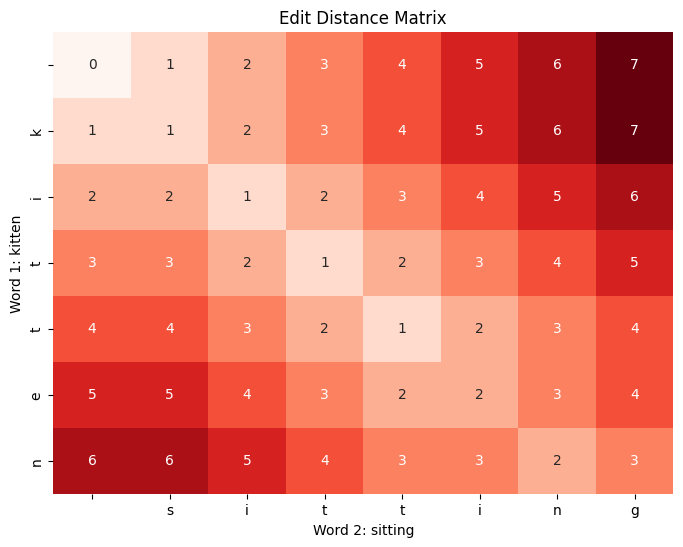

In [56]:
# Doing it manually and visualizing the matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def levenshtein_distance(word1, word2):
    # Get the lengths of the two words
    len_word1 = len(word1)
    len_word2 = len(word2)

    dp = np.zeros((len_word1 + 1, len_word2 + 1), dtype=int)

    # Initialize the first row and column of the matrix
    for i in range(len_word1 + 1):
        dp[i][0] = i  
    for j in range(len_word2 + 1):
        dp[0][j] = j 

    for i in range(1, len_word1 + 1):
        for j in range(1, len_word2 + 1):
            # If characters are the same, no cost, otherwise substitution cost is 2
            cost = 0 if word1[i - 1] == word2[j - 1] else 1
            dp[i][j] = min(dp[i - 1][j] + 1,      # Deletion
                           dp[i][j - 1] + 1,      # Insertion
                           dp[i - 1][j - 1] + cost)  # Substitution

    return dp

def visualize_edit_distance(dp, word1, word2):
    plt.figure(figsize=(8, 6))
    sns.heatmap(dp, annot=True, fmt="d", cmap="Reds", cbar=False,
                xticklabels=[""] + list(word2), yticklabels=[""] + list(word1))
    plt.xlabel("Word 2: " + word2)
    plt.ylabel("Word 1: " + word1)
    plt.title("Edit Distance Matrix")
    plt.show()

# Example words
word1 = "kitten"
word2 = "sitting"

# Calculate the Levenshtein distance and the edit distance matrix
dp_matrix = levenshtein_distance(word1, word2)

# Print the minimum edit distance
min_distance = dp_matrix[len(word1)][len(word2)]
print(f"Levenshtein distance between '{word1}' and '{word2}': {min_distance}")

# Visualize the edit distance matrix
visualize_edit_distance(dp_matrix, word1, word2)
